In [1]:
import os
import pandas as pd

# Directory path
dir_path = 'D:\\VScode\\Last_deglaciation\\data_fig3\\all_inso'

# List all .txt files in the directory
all_files = [f for f in os.listdir(dir_path) if f.endswith('.txt')]
# remove 'j_0north.txt' from the list
selected_files=all_files
# selected_files.remove('j_0north.txt')

# # remove the 'j_90north.txt'
# selected_files.remove('j_90north.txt')

selected_files.remove('j_0north.txt')
selected_files.insert(0,'j_0north.txt')

# move 'j_5north.txt' to the first place
selected_files.remove('j_5north.txt')
selected_files.insert(1,'j_5north.txt')

#move the 'j_5south.txt' to the second place
selected_files.remove('j_5south.txt')
selected_files.insert(2,'j_5south.txt')



# Create a dictionary to store each processed DataFrame with filename as the key
processed_dataframes = {}

for file in selected_files:
    full_path = os.path.join(dir_path, file)
    # Read the file
    df = pd.read_csv(full_path, sep='\s+', header=0, skiprows=8)
    
    # Process the DataFrame
    df.rename(columns={'NaN': 'age'}, inplace=True)
    df['age'] = df['age'] * 1000
    
    # Store the processed DataFrame in the dictionary
    processed_dataframes[file] = df



In [51]:
processed_dataframes['j_0north.txt'].columns

Index(['age', '0', '25', '50', '75', '100', '125', '150', '175', '200', '225',
       '250', '275', '300', '325', '350', '375', '400', '425', '450', '475',
       '500', '525', '550', '575', '600'],
      dtype='object')

In [19]:
processed_dataframes['j_0north.txt']

,age,0,25,50,75,100,125,150,175,200,...,375,400,425,450,475,500,525,550,575,600
0,0,13.120,13.120,13.120,13.120,13.120,13.120,13.120,13.120,13.120,...,13.120,10.609,5.277,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,1000,13.114,13.114,13.114,13.114,13.114,13.114,13.114,13.114,13.114,...,13.114,10.546,5.321,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,13.108,13.108,13.108,13.108,13.108,13.108,13.108,13.108,13.108,...,13.108,10.557,5.012,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,3000,13.103,13.103,13.103,13.103,13.103,13.103,13.103,13.103,13.103,...,13.103,10.640,4.128,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,4000,13.098,13.098,13.098,13.098,13.098,13.098,13.098,13.098,13.098,...,13.098,10.820,3.500,0.000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4996000,13.159,13.159,13.159,13.159,13.159,13.159,13.159,13.159,13.159,...,13.159,10.459,4.118,1.432,0.0,0.0,0.0,0.0,0.0,0.0
4997,4997000,13.161,13.161,13.161,13.161,13.161,13.161,13.161,13.161,13.161,...,13.161,10.325,5.057,0.549,0.0,0.0,0.0,0.0,0.0,0.0
4998,4998000,13.163,13.163,13.163,13.163,13.163,13.163,13.163,13.163,13.163,...,13.163,10.250,6.446,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4999,4999000,13.164,13.164,13.164,13.164,13.164,13.164,13.164,13.164,13.164,...,13.164,10.224,7.049,0.000,0.0,0.0,0.0,0.0,0.0,0.0


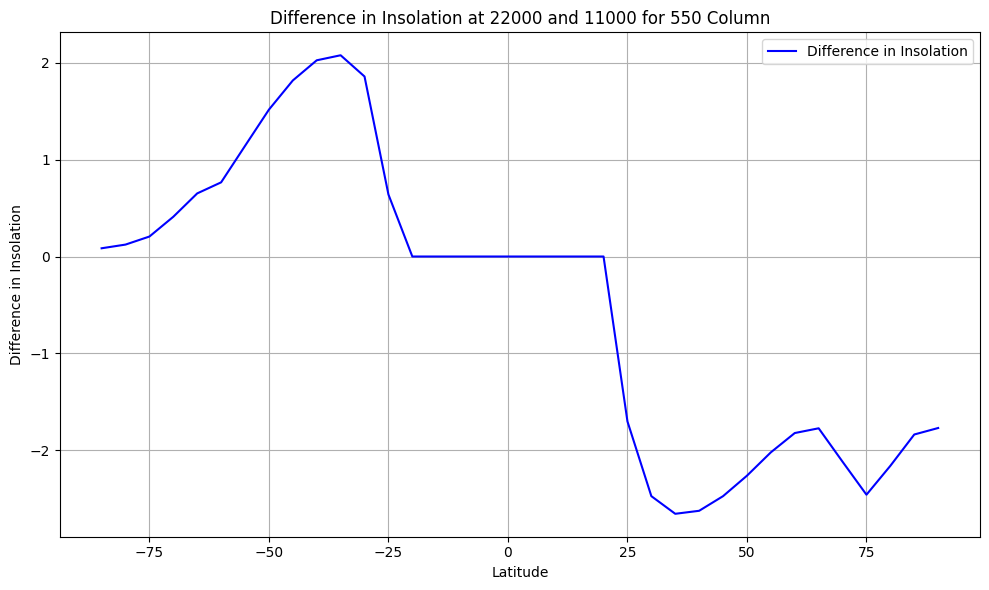

In [48]:
import numpy as np

# Initialize an empty list to store latitude and difference values
results = []

# Loop through the processed_dataframes dictionary to process each dataframe
for file, df in processed_dataframes.items():
    # 1. Extract latitude
    latitude = int(file.split('j_')[1].split('north')[0].split('south')[0])
    # Assign negative value for southern hemisphere
    if 'south' in file:
        latitude = -latitude
    
    # 2. Sample values and calculate difference
    value_at_22000 = df[df['age'] == 22000]['500'].values[0]
    value_at_11000 = df[df['age'] == 11000]['500'].values[0]
    difference =  (value_at_22000-value_at_11000)
    
    # Append the results to the list
    results.append([latitude, difference])

# 3. Convert the list of results into an ndarray
results_array = np.array(results)

# sort the results_array by latitude
results_array = results_array[results_array[:, 0].argsort()]

# print(results_array)



import matplotlib.pyplot as plt

# Extracting latitude and difference values from the results_array
latitudes = results_array[:, 0]
differences = results_array[:, 1]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, differences, '-', label='Difference in Insolation', color='blue')
plt.title('Difference in Insolation at 22000 and 11000 for 550 Column')
plt.xlabel('Latitude')
plt.ylabel('Difference in Insolation')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()



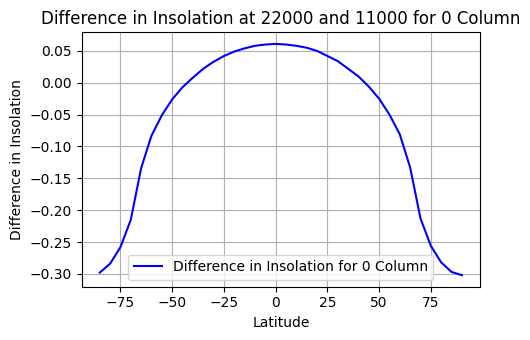

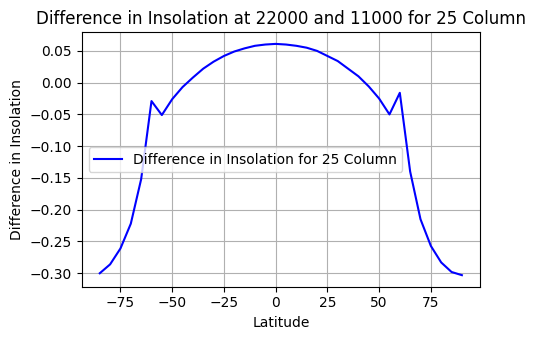

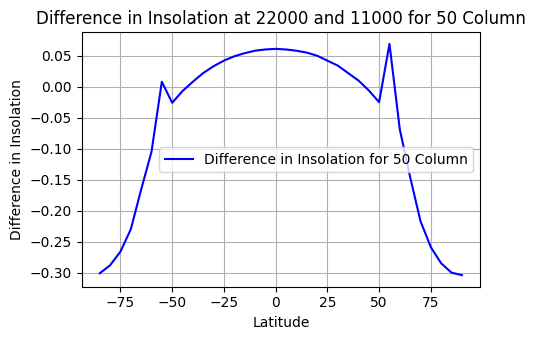

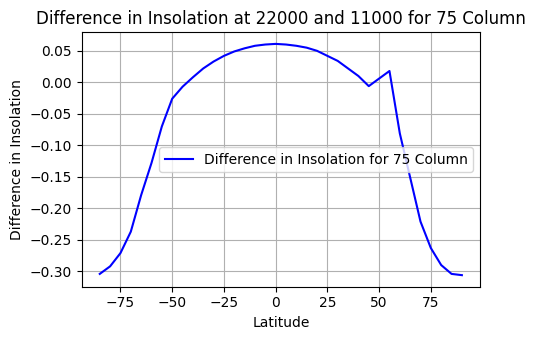

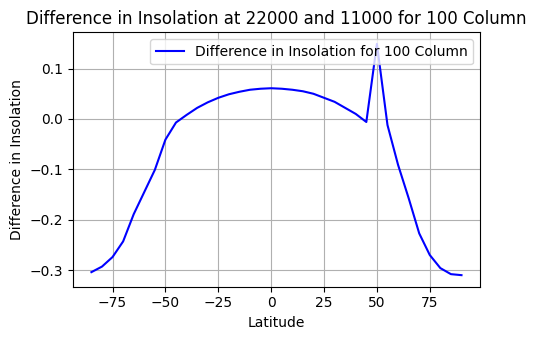

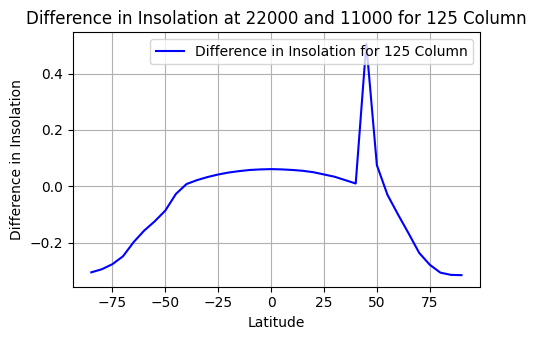

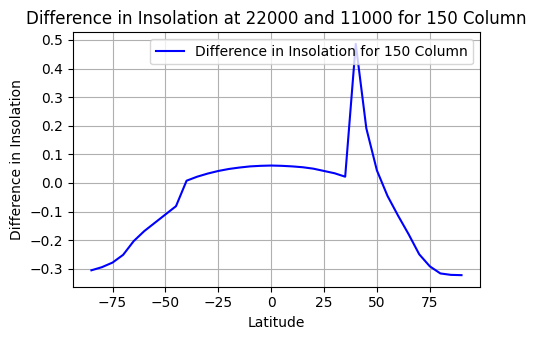

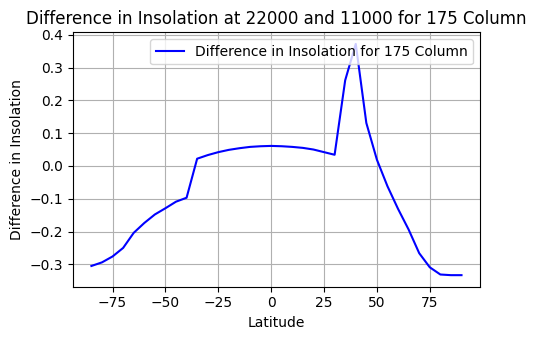

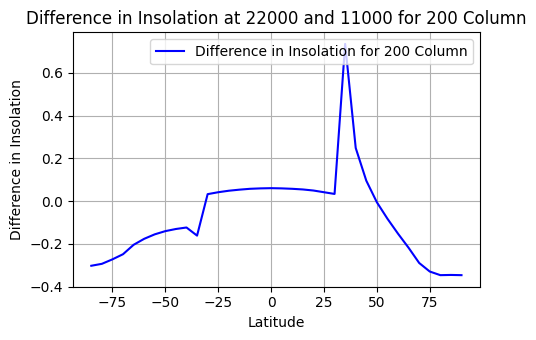

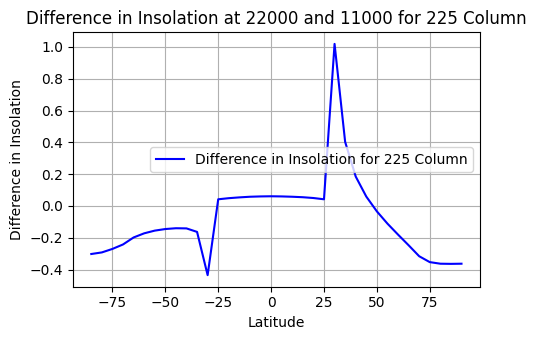

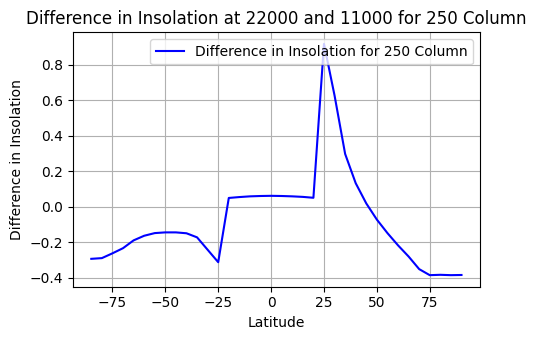

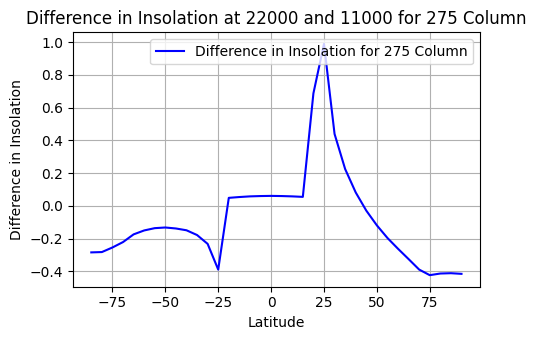

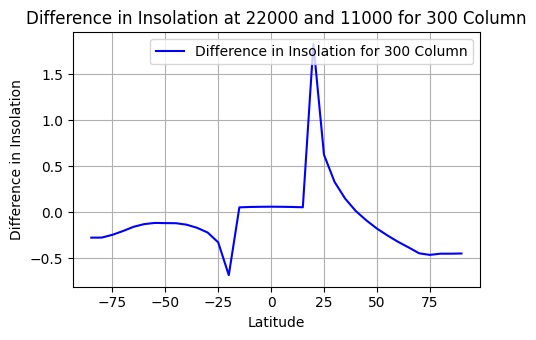

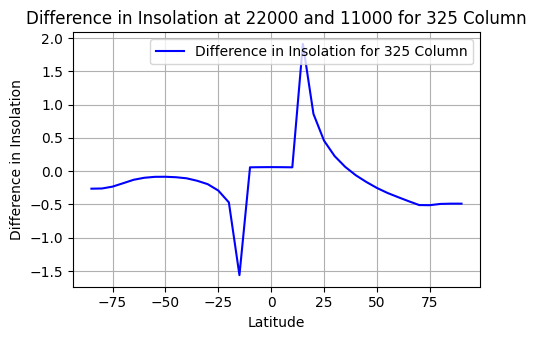

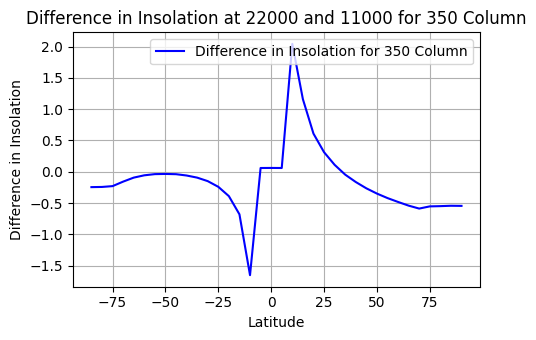

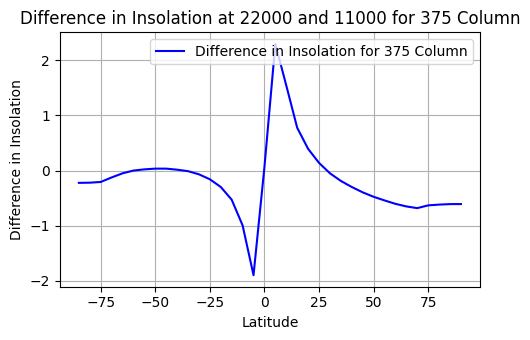

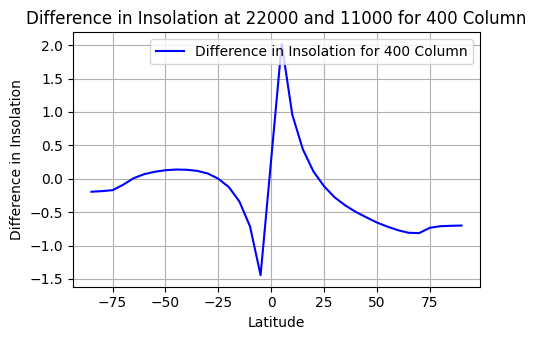

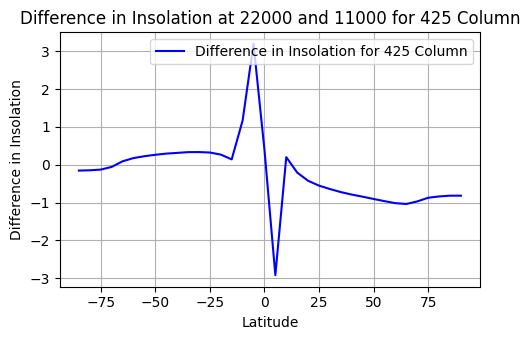

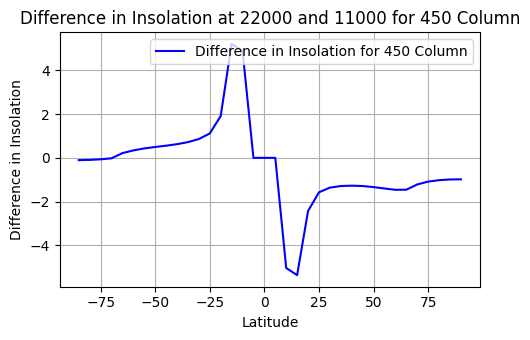

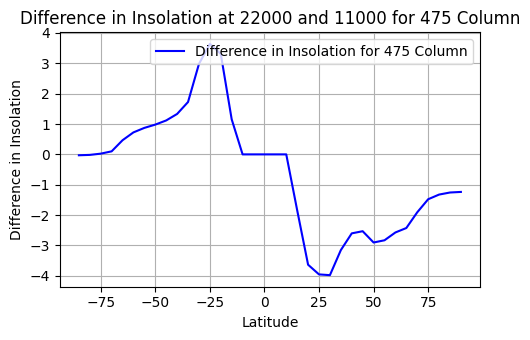

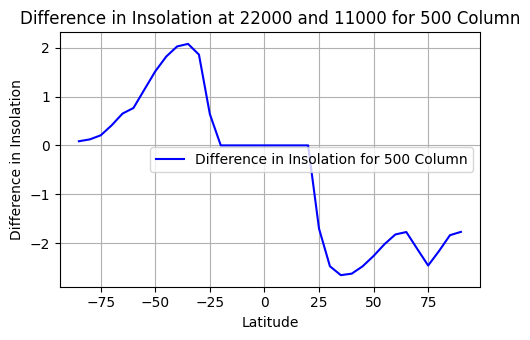

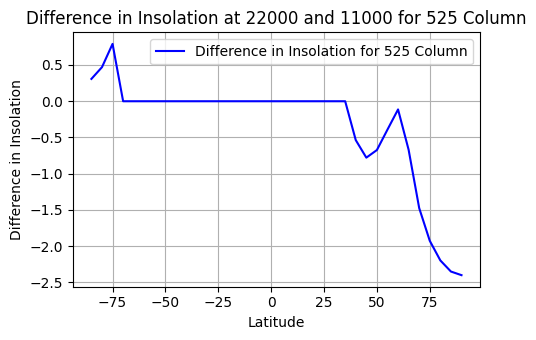

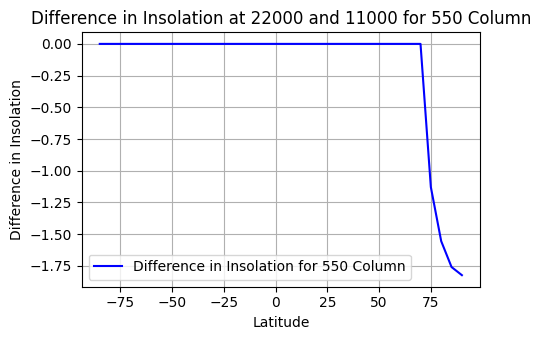

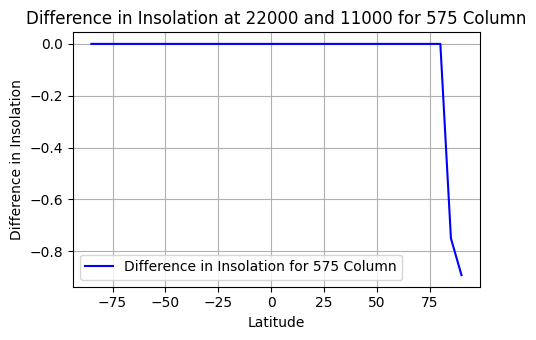

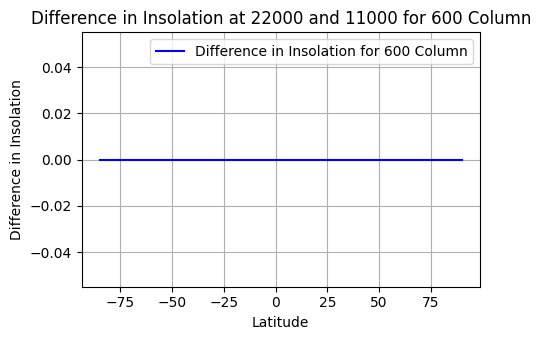

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Loop through columns in the df
for column in df.columns:
    if column != 'age':  # Exclude the age column
        
        # Initialize an empty list to store latitude and difference values for each column
        results = []

        # Loop through the processed_dataframes dictionary to process each dataframe
        for file, df in processed_dataframes.items():
            # 1. Extract latitude
            latitude = int(file.split('j_')[1].split('north')[0].split('south')[0])
            # Assign negative value for southern hemisphere
            if 'south' in file:
                latitude = -latitude
            
            # 2. Sample values and calculate difference
            value_at_22000 = df[df['age'] == 22000][column].values[0]
            value_at_11000 = df[df['age'] == 11000][column].values[0]
            difference = value_at_22000 - value_at_11000
            
            # Append the results to the list
            results.append([latitude, difference])

        # 3. Convert the list of results into an ndarray
        results_array = np.array(results)

        # Sort the results_array by latitude
        results_array = results_array[results_array[:, 0].argsort()]

        # Extracting latitude and difference values from the results_array
        latitudes = results_array[:, 0]
        differences = results_array[:, 1]

        # Plotting the data
        plt.figure(figsize=(5, 3.5))
        plt.plot(latitudes, differences, '-', label=f'Difference in Insolation for {column} Column', color='blue')
        plt.title(f'Difference in Insolation at 22000 and 11000 for {column} Column')
        plt.xlabel('Latitude')
        plt.ylabel('Difference in Insolation')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Display the plot
        plt.show()


C:\Users\zps19\AppData\Local\Temp\ipykernel_29368\1582432095.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x_map, y_map, heatmap_data, shading='auto', cmap='viridis',alpha=1)


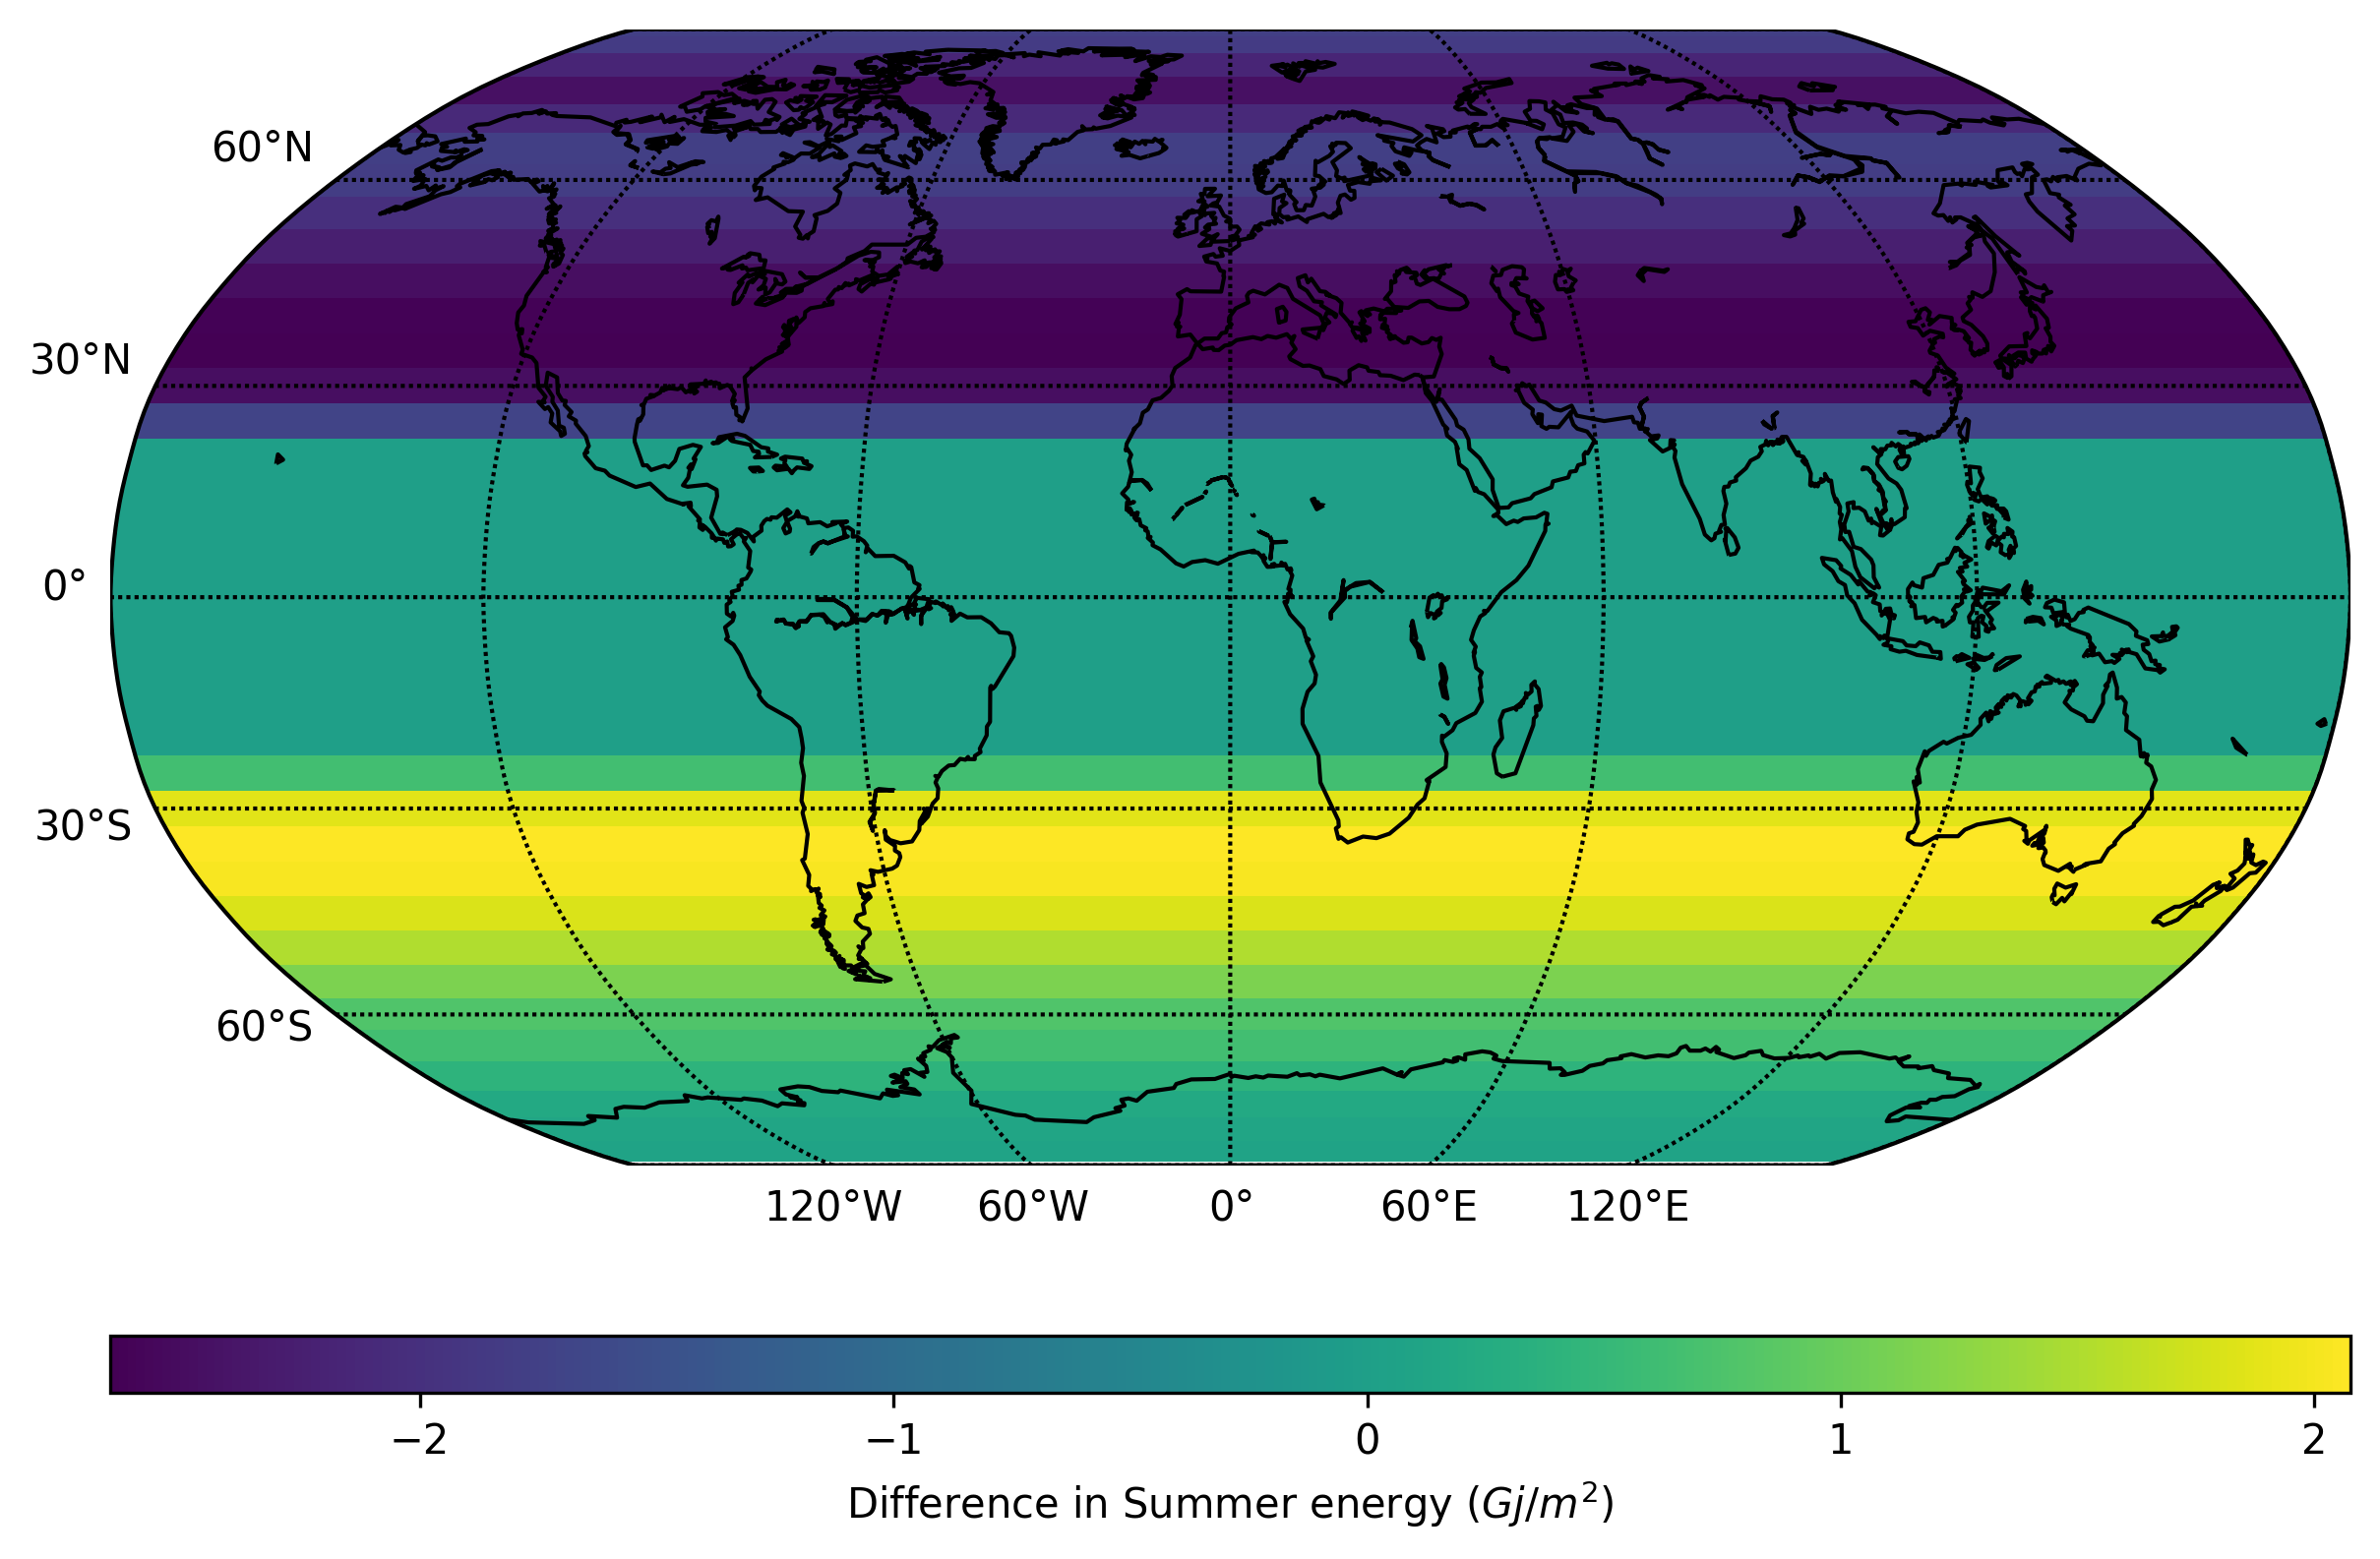

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define longitudes (from -180 to 180 with 10-degree steps)
longitudes = np.arange(-180, 180.1, 10)
latitudes = results_array[:, 0]

# Broadcast results_array to each longitude
heatmap_data = np.repeat(results_array[:, 1][:, np.newaxis], len(longitudes), axis=1)

# Create a new figure and set its size
fig = plt.figure(figsize=(15, 6), dpi=300)

# Define the map with Robinson projection
m = Basemap(projection='robin', lon_0=0, resolution='c')

# Define the x, y grid for the map
x, y = np.meshgrid(longitudes, latitudes)
x_map, y_map = m(x, y)

# Draw the heatmap on the map
m.pcolormesh(x_map, y_map, heatmap_data, shading='auto', cmap='viridis',alpha=1)
m.colorbar(label="Difference in Summer energy $(Gj/m^2)$", location='bottom', pad='15%',shrink=0.5)

# Draw coastlines, countries and parallels & meridians
m.drawcoastlines()
# m.drawcountries()
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(0., 360., 60.), labels=[0, 0, 0, 1])

# Set the title for the plot
# plt.title('Difference in Insolation at 22000 and 11000 for 500 Column')

# Display the map with the heatmap
plt.show()


age
0          0.0
1000       0.0
2000       0.0
3000       0.0
4000       0.0
          ... 
4996000    0.0
4997000    0.0
4998000    0.0
4999000    0.0
5000000    0.0
Name: 500, Length: 5001, dtype: float64


(0.0, 25000.0)

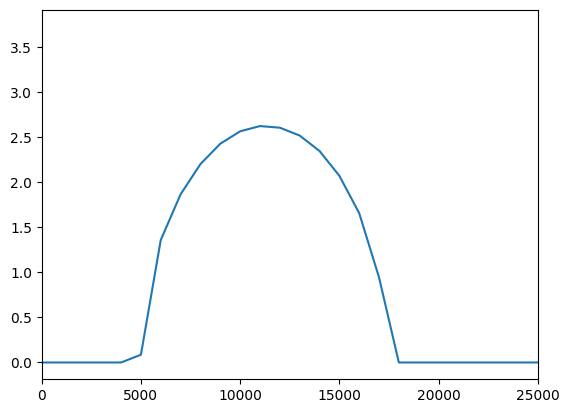

In [65]:
data=processed_dataframes['j_40north.txt'].set_index('age')['500']
print(data)
plt.plot(processed_dataframes['j_40north.txt'].age,data)
# set xlim 
plt.xlim(0, 25000)

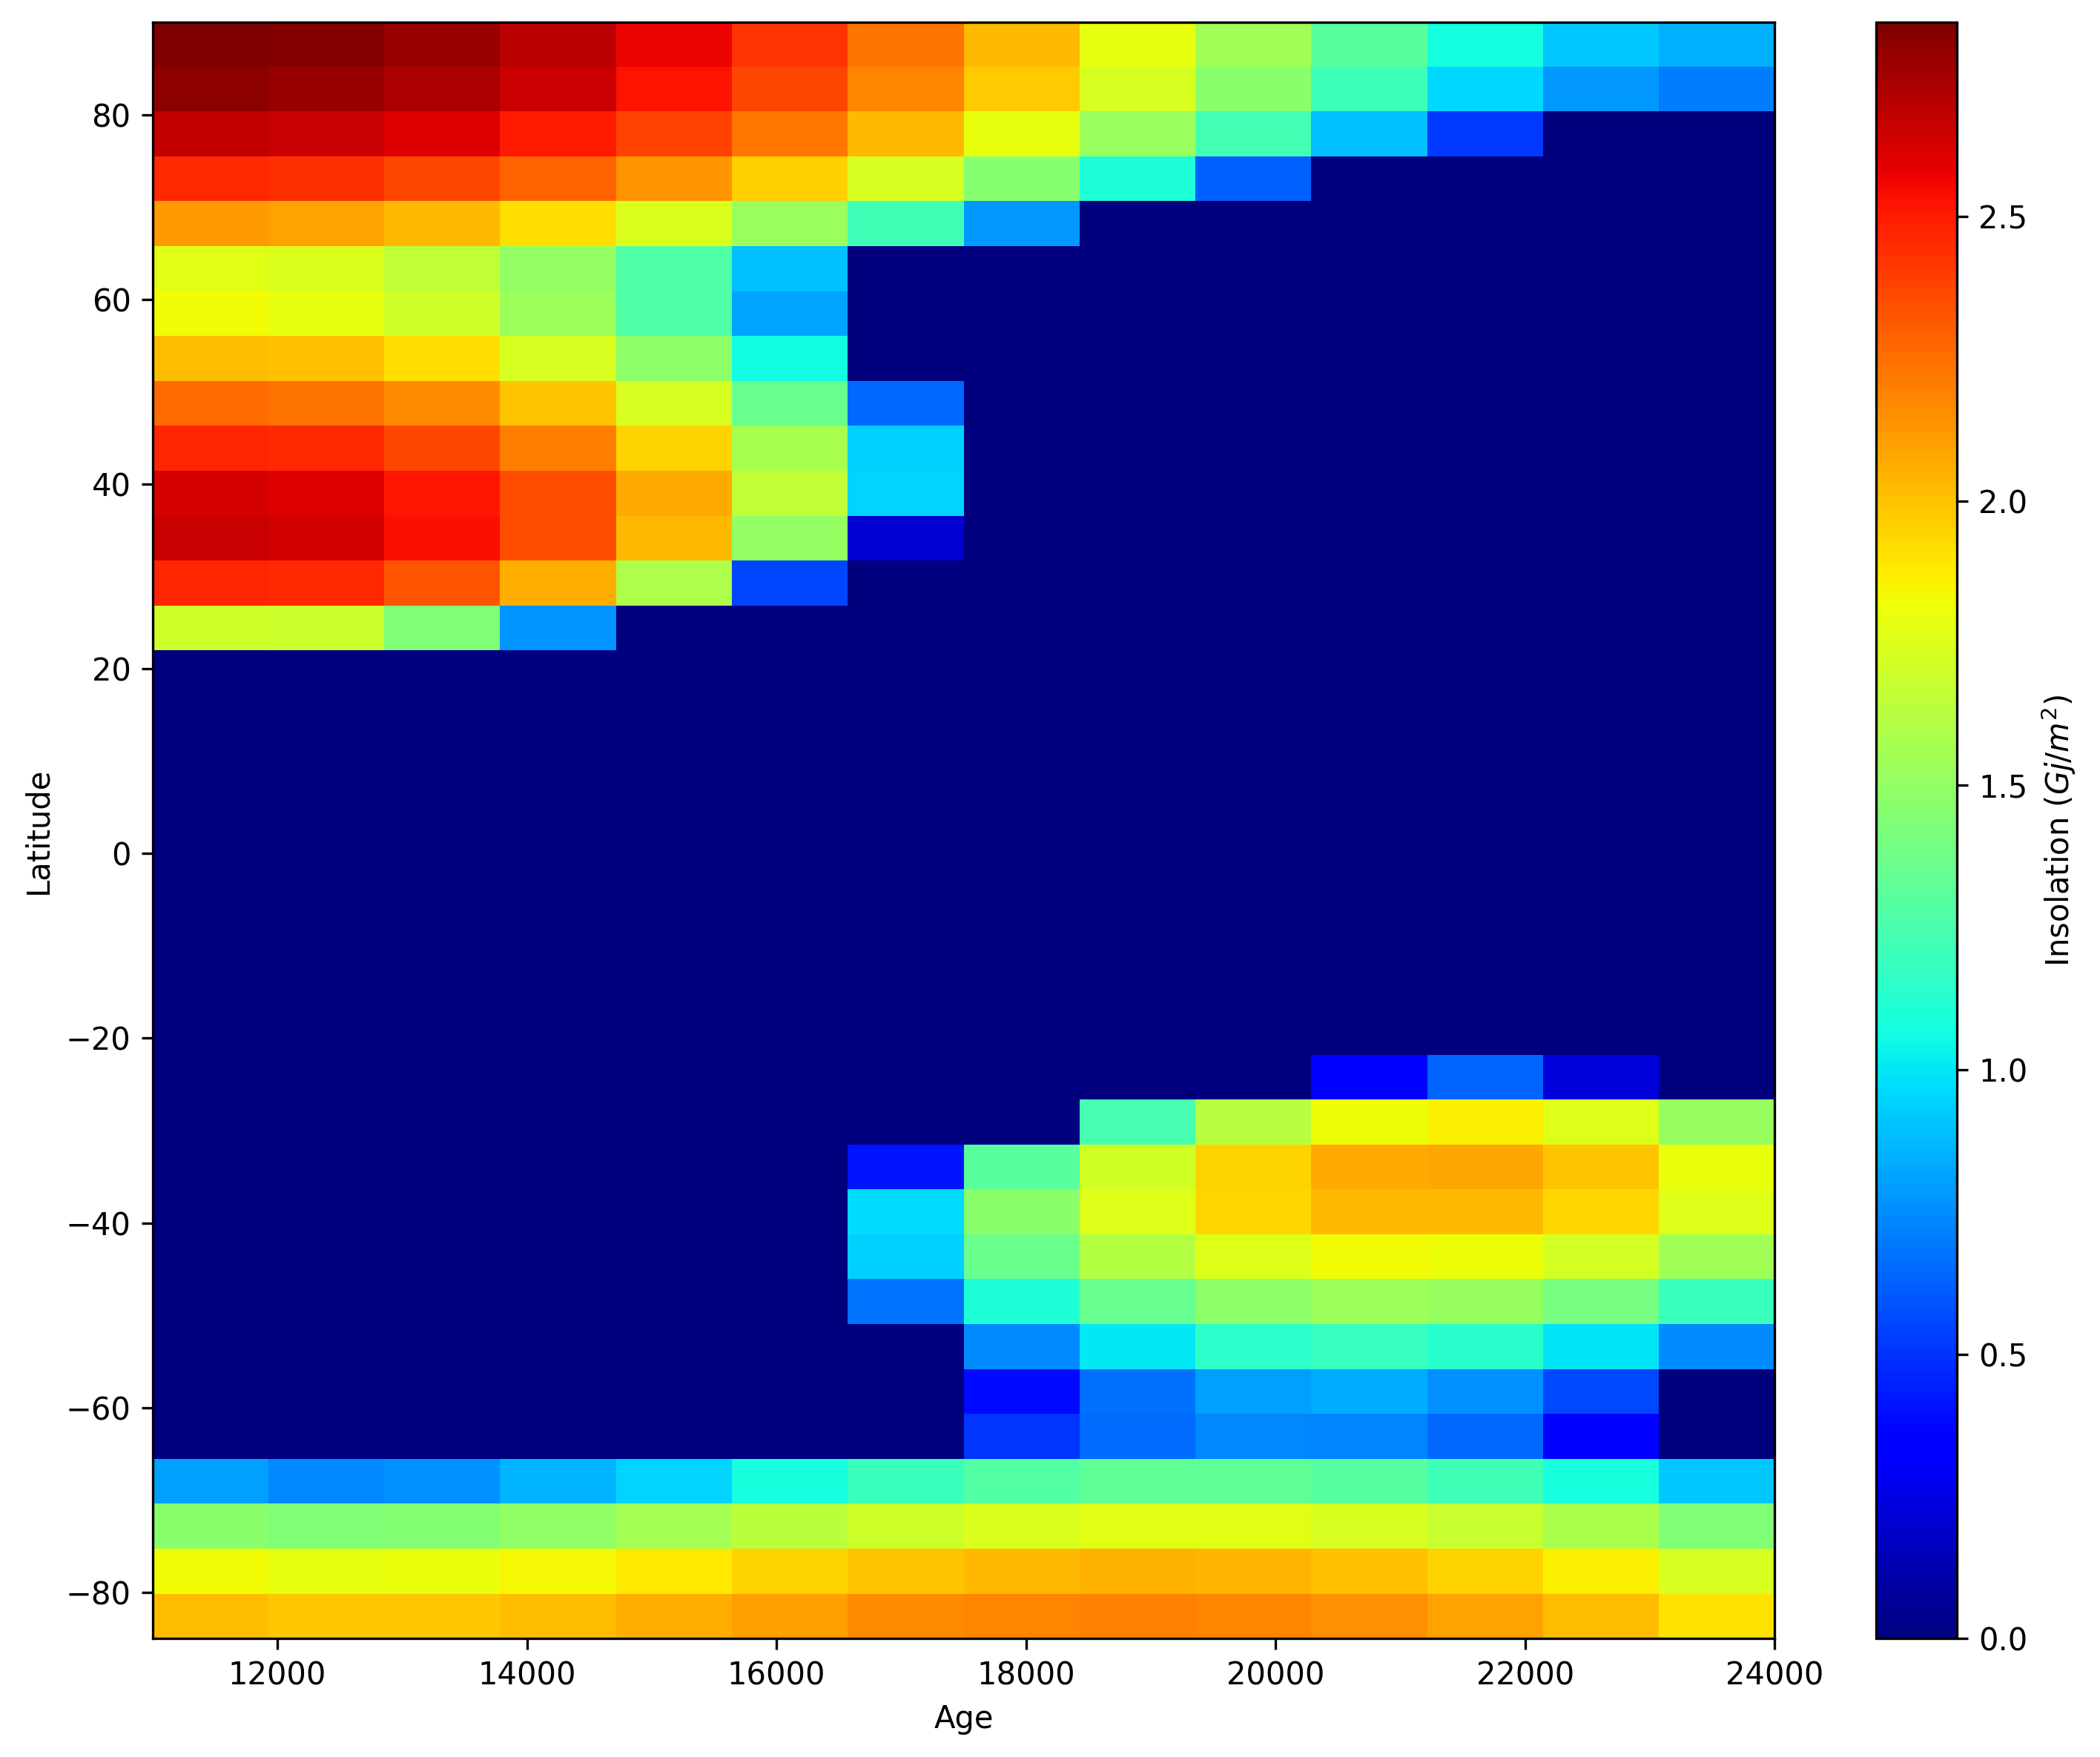

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Initialize an empty DataFrame to hold the data for the heat map
heatmap_data = pd.DataFrame()

# Loop through the dictionary items
for file, df in processed_dataframes.items():
    # 1. Extract latitude
    latitude = int(file.split('j_')[1].split('north')[0].split('south')[0])
    # Assign negative value for southern hemisphere
    if 'south' in file:
        latitude = -latitude

    # Get the data from the '500' column
    insolation_data = df.set_index('age')['500']

    # crop data and only keep the data from 10000 to 24000
    insolation_data = insolation_data[insolation_data.index >= 11000]
    insolation_data = insolation_data[insolation_data.index <= 24000]
    
    # Append the data to the heatmap_data DataFrame
    heatmap_data[latitude] = insolation_data

# Sort the columns of heatmap_data to have latitudes in order
heatmap_data = heatmap_data.sort_index(axis=1)

# Create the heat map
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
cax = ax.imshow(np.transpose(heatmap_data), aspect='auto', cmap='jet', origin='lower',
                extent=[heatmap_data.index.min(), heatmap_data.index.max(),
                        heatmap_data.columns.min(), heatmap_data.columns.max()],
                interpolation='nearest')

# set the xlim
# ax.set_xlim(1000, 24000)
# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Latitude')
# ax.set_title('Insolation Data Heat Map')

# Create a colorbar
cbar = fig.colorbar(cax, label='Insolation $(Gj/m^2)$')

plt.tight_layout()
plt.show()


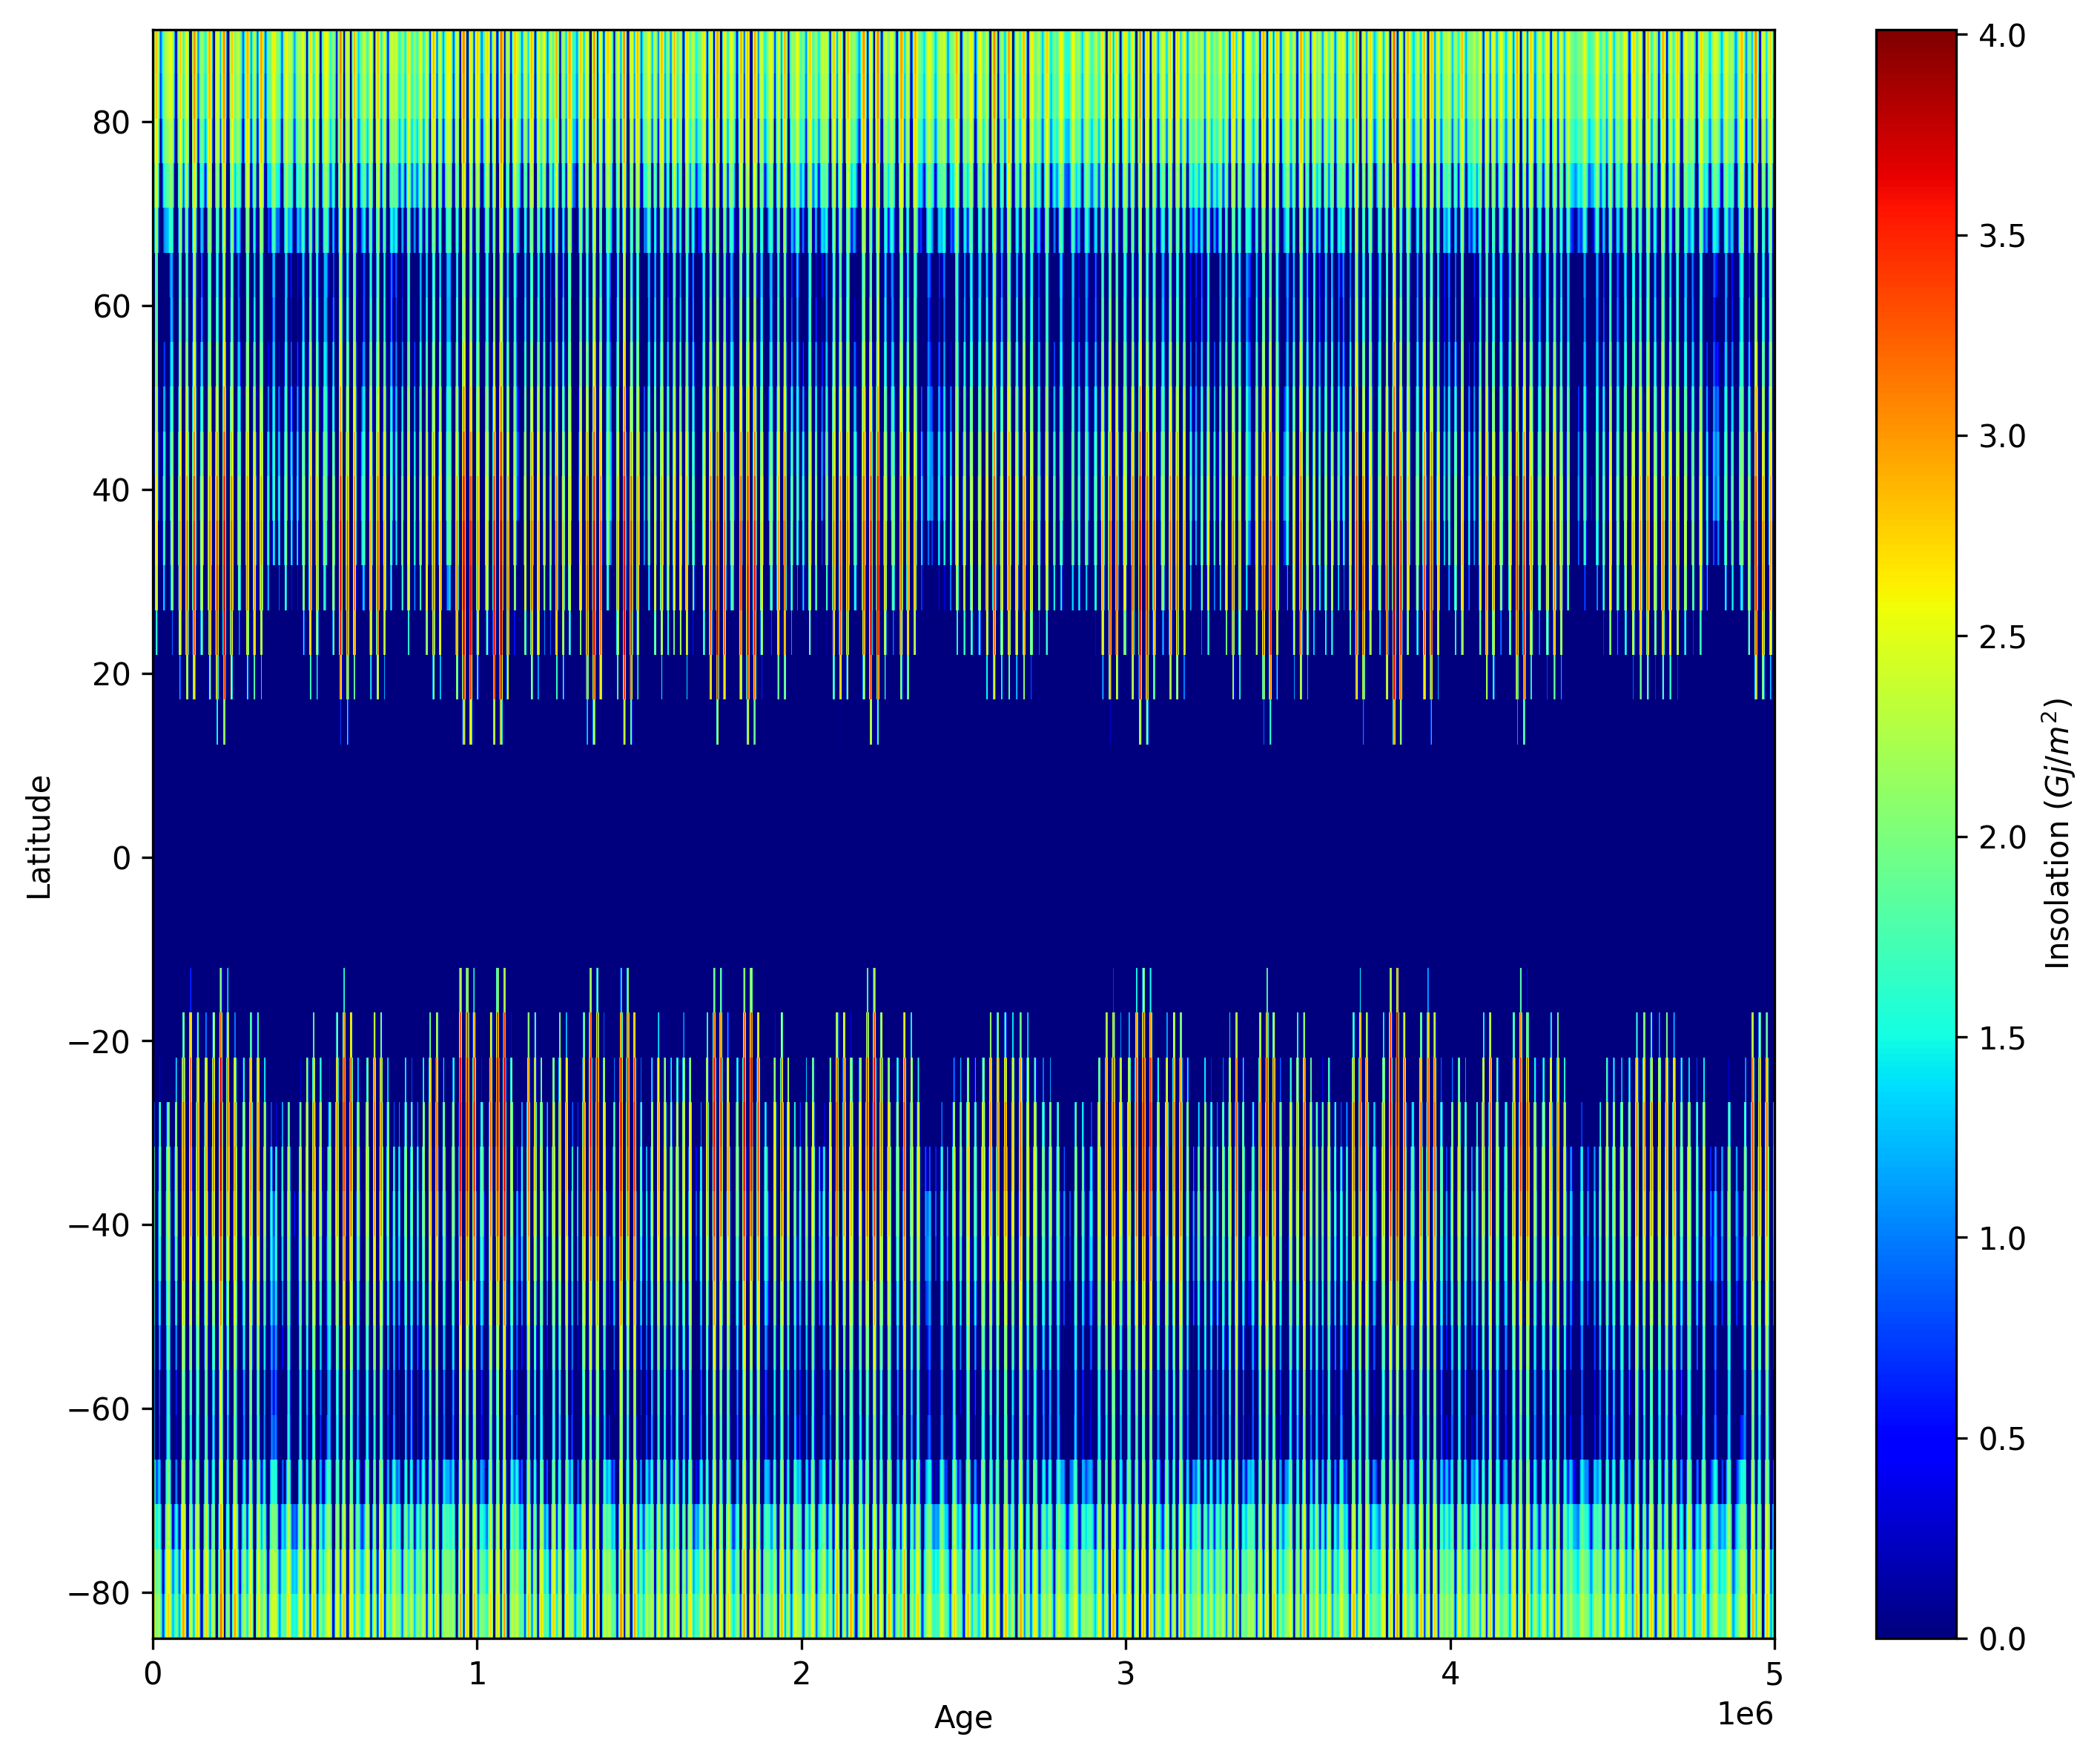

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Initialize an empty DataFrame to hold the data for the heat map
heatmap_data = pd.DataFrame()

# Loop through the dictionary items
for file, df in processed_dataframes.items():
    # 1. Extract latitude
    latitude = int(file.split('j_')[1].split('north')[0].split('south')[0])
    # Assign negative value for southern hemisphere
    if 'south' in file:
        latitude = -latitude

    # Get the data from the '500' column
    insolation_data = df.set_index('age')['500']

    # # crop data and only keep the data from 10000 to 24000
    # insolation_data = insolation_data[insolation_data.index >= 11000]
    # insolation_data = insolation_data[insolation_data.index <= 24000]
    
    # Append the data to the heatmap_data DataFrame
    heatmap_data[latitude] = insolation_data

# Sort the columns of heatmap_data to have latitudes in order
heatmap_data = heatmap_data.sort_index(axis=1)

# Create the heat map
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
cax = ax.imshow(np.transpose(heatmap_data), aspect='auto', cmap='jet', origin='lower',
                extent=[heatmap_data.index.min(), heatmap_data.index.max(),
                        heatmap_data.columns.min(), heatmap_data.columns.max()],
                interpolation='nearest')

# set the xlim
# ax.set_xlim(1000, 24000)
# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Latitude')
# ax.set_title('Insolation Data Heat Map')

# Create a colorbar
cbar = fig.colorbar(cax, label='Insolation $(Gj/m^2)$')

plt.tight_layout()
plt.show()


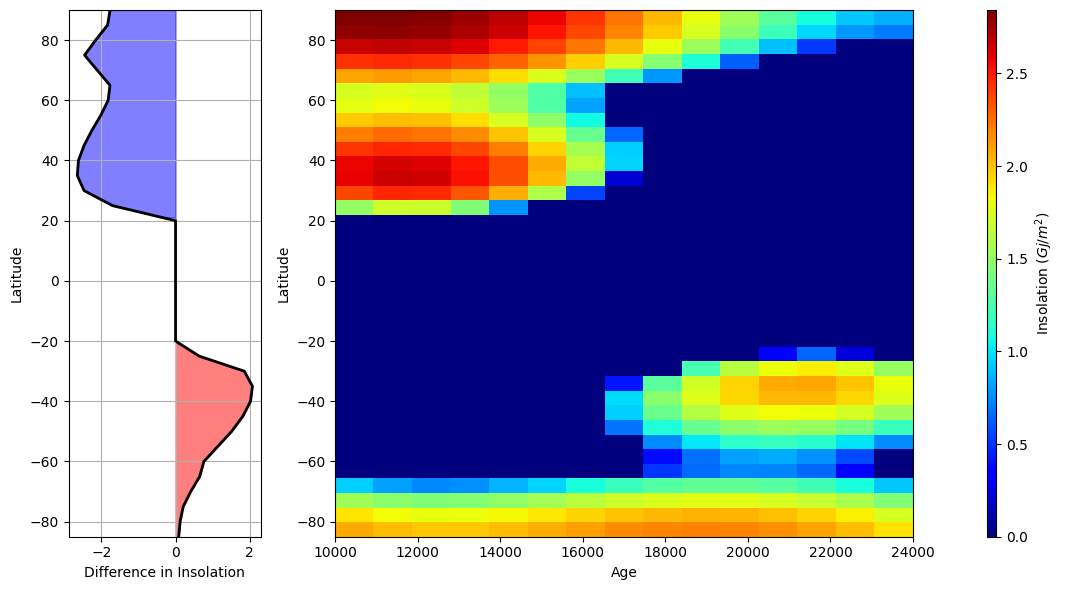

In [116]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np


# Create a GridSpec object
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 3, 0.05, 0.05])  # The first plot has 1/4 the width of the second plot

fig = plt.figure(figsize=(11, 6), dpi=100)






# Initialize an empty list to store latitude and difference values
results = []

# Loop through the processed_dataframes dictionary to process each dataframe
for file, df in processed_dataframes.items():
    # 1. Extract latitude
    latitude = int(file.split('j_')[1].split('north')[0].split('south')[0])
    # Assign negative value for southern hemisphere
    if 'south' in file:
        latitude = -latitude
    
    # 2. Sample values and calculate difference
    value_at_22000 = df[df['age'] == 22000]['500'].values[0]
    value_at_11000 = df[df['age'] == 11000]['500'].values[0]
    difference =  (value_at_22000-value_at_11000)
    
    # Append the results to the list
    results.append([latitude, difference])

# 3. Convert the list of results into an ndarray
results_array = np.array(results)

# sort the results_array by latitude
results_array = results_array[results_array[:, 0].argsort()]

# Extracting latitude and difference values from the results_array
latitudes = results_array[:, 0]
differences = results_array[:, 1]

# interpolate the differences with latitude step 1
latitudes = np.arange(-85, 91, 1)
differences = np.interp(latitudes, results_array[:, 0], results_array[:, 1])


# Create the left plot (line plot)
ax0 = plt.subplot(gs[0])
# ax0.plot(differences,latitudes,  '-', label='Difference in Insolation', color='blue')
# plot the data with dash gray line with width 2
ax0.plot(differences, latitudes, '-', color='black', linewidth=2)


# fill the area where the line-x=0 is positive with red color
ax0.fill_betweenx(latitudes, differences, where=differences > 0, color='red', alpha=0.5)
# fill the area where the line-x=0 is negative with blue color
ax0.fill_betweenx(latitudes, differences, where=differences < 0, color='blue', alpha=0.5)



# set ylim
ax0.set_ylim(-85, 90)
# ax0.set_title('Difference in Insolation at 22000 and 11000 for 550 Column')
ax0.set_ylabel('Latitude')
ax0.set_xlabel('Difference in Insolation')
# ax0.legend()
ax0.grid(True)




# Initialize an empty DataFrame to hold the data for the heat map
heatmap_data = pd.DataFrame()

# Loop through the dictionary items
for file, df in processed_dataframes.items():
    # 1. Extract latitude
    latitude = int(file.split('j_')[1].split('north')[0].split('south')[0])
    # Assign negative value for southern hemisphere
    if 'south' in file:
        latitude = -latitude

    # Get the data from the '500' column
    insolation_data = df.set_index('age')['500']

    # crop data and only keep the data from 10000 to 24000
    insolation_data = insolation_data[insolation_data.index >= 10000]
    insolation_data = insolation_data[insolation_data.index <= 24000]
    
    # Append the data to the heatmap_data DataFrame
    heatmap_data[latitude] = insolation_data

# Sort the columns of heatmap_data to have latitudes in order
heatmap_data = heatmap_data.sort_index(axis=1)





# Create the right plot (heatmap)
ax1 = plt.subplot(gs[1])
cax = ax1.imshow(np.transpose(heatmap_data), aspect='auto', cmap='jet', origin='lower',
                 extent=[heatmap_data.index.min(), heatmap_data.index.max(),
                         heatmap_data.columns.min(), heatmap_data.columns.max()],
                 interpolation='nearest')

# Set labels and title
ax1.set_xlabel('Age')
ax1.set_ylabel('Latitude')
# ax1.set_title('Insolation Data Heat Map')

# Create a colorbar
cbar_ax = plt.subplot(gs[2])  # Create an axes for the colorbar
fig.colorbar(cax, cax=cbar_ax, label='Insolation $(Gj/m^2)$')

plt.tight_layout()
plt.show()
